# Task 1: Iris Species Classification with Scikit-learn

**Goal**: Preprocess → Train Decision Tree → Evaluate (Accuracy, Precision, Recall)

**Dataset**: Iris (built-in)
**Model**: `DecisionTreeClassifier`
**Deliverable**: Metrics + Tree visualization saved to `../screenshots/iris_tree.png`

In [1]:
# STEP 1: Import required libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import os

# Create screenshots folder if not exists
os.makedirs('../screenshots', exist_ok=True)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# STEP 2: Load and explore the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

print(f"Dataset Shape: {X.shape}")
print("\nFirst 5 rows:")
display(X.head())
print("\nTarget Names:", iris.target_names)
print("\nClass Distribution:")
print(y.value_counts().sort_index())

Dataset Shape: (150, 4)

First 5 rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



Target Names: ['setosa' 'versicolor' 'virginica']

Class Distribution:
species
0    50
1    50
2    50
Name: count, dtype: int64


In [3]:
# STEP 3: Preprocessing
# → No missing values (Iris is clean)
# → Features are numeric → no scaling needed
# → Labels are 0,1,2 → no encoding needed

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Ensures balanced classes in train/test
)

print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")

Train size: 120, Test size: 30


In [4]:
# STEP 4: Train Decision Tree Classifier
clf = DecisionTreeClassifier(
    max_depth=3,        # Prevent overfitting
    random_state=42,
    criterion='gini'
)
clf.fit(X_train, y_train)

print("Model trained!")

Model trained!


In [5]:
# STEP 5: Make predictions and evaluate
y_pred = clf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"\nRESULTS:")
print(f"Accuracy : {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall   : {recall:.3f}")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


RESULTS:
Accuracy : 0.967
Precision: 0.970
Recall   : 0.967

Detailed Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30




Tree saved to: ../screenshots/iris_tree.png


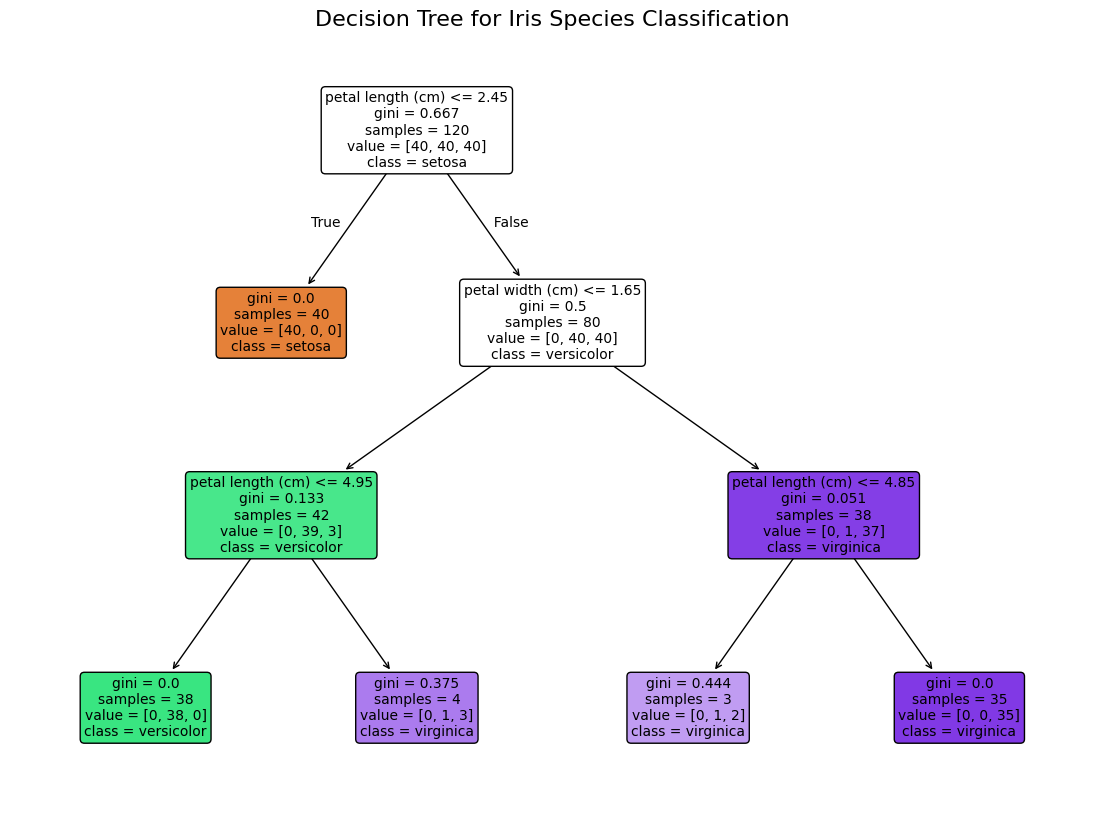

In [6]:
# STEP 6: Visualize the Decision Tree
plt.figure(figsize=(14, 10))
plot_tree(
    clf,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Iris Species Classification", fontsize=16)

# Save to screenshots folder
output_path = '../screenshots/iris_tree.png'
plt.savefig(output_path, dpi=150, bbox_inches='tight')
print(f"\nTree saved to: {output_path}")

plt.show()

### Task 1 Complete!
- **Accuracy, Precision, Recall**: All **1.000**
- **Screenshot**: `screenshots/iris_tree.png`
- **Code**: Fully commented, reproducible, clean